In [1]:
#import all necessary libraris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
#load data set
df=pd.read_csv("Flight_price_csv.csv")
df.head(10)

,Unnamed: 0,Airline,Date,Source,Destination,Stops,Arrival_Time,Dep_Time,Duration,Add_info,Price
0,0,Air India,"Tue, 23 Nov 2021",Bangalore,New Delhi,Non Stop,20:20,17:20,3h 00m,Free Meal,"3,234"
1,1,Air India,"Tue, 23 Nov 2021",Bangalore,New Delhi,Non Stop,08:45,05:45,3h 00m,Free Meal,"3,546"
2,2,IndiGo,"Tue, 23 Nov 2021",Bangalore,New Delhi,1 Stop,23:45,18:45,5h 00m,No Meal Fare,"3,546"
3,3,IndiGo,"Tue, 23 Nov 2021",Bangalore,New Delhi,1 Stop,18:10,13:05,5h 05m,No Meal Fare,"3,546"
4,4,IndiGo,"Tue, 23 Nov 2021",Bangalore,New Delhi,1 Stop,20:25,15:20,5h 05m,No Meal Fare,"3,546"
5,5,IndiGo,"Tue, 23 Nov 2021",Bangalore,New Delhi,1 Stop,00:45\n+ 1 day,18:45,6h 00m,No Meal Fare,"3,546"
6,6,IndiGo,"Tue, 23 Nov 2021",Bangalore,New Delhi,1 Stop,22:25,16:20,6h 05m,No Meal Fare,"3,546"
7,7,IndiGo,"Tue, 23 Nov 2021",Bangalore,New Delhi,1 Stop,19:55,13:05,6h 50m,No Meal Fare,"3,546"
8,8,IndiGo,"Tue, 23 Nov 2021",Bangalore,New Delhi,1 Stop,01:40\n+ 1 day,18:40,7h 00m,No Meal Fare,"3,546"
9,9,IndiGo,"Tue, 23 Nov 2021",Bangalore,New Delhi,1 Stop,18:30,11:20,7h 10m,No Meal Fare,"3,546"


In [3]:
df.shape

(2197, 11)

dataset have 2197 rows and 11 columns

In [4]:
df.dtypes

Unnamed: 0       int64
Airline         object
Date            object
Source          object
Destination     object
Stops           object
Arrival_Time    object
Dep_Time        object
Duration        object
Add_info        object
Price           object
dtype: object

data set have values of object data type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2197 non-null   int64 
 1   Airline       2197 non-null   object
 2   Date          2197 non-null   object
 3   Source        2197 non-null   object
 4   Destination   2197 non-null   object
 5   Stops         2197 non-null   object
 6   Arrival_Time  2197 non-null   object
 7   Dep_Time      2197 non-null   object
 8   Duration      2197 non-null   object
 9   Add_info      2197 non-null   object
 10  Price         2197 non-null   object
dtypes: int64(1), object(10)
memory usage: 188.9+ KB


data set have 11 columns and 2197 values of oject type.

In [6]:
df.isnull().sum()

Unnamed: 0      0
Airline         0
Date            0
Source          0
Destination     0
Stops           0
Arrival_Time    0
Dep_Time        0
Duration        0
Add_info        0
Price           0
dtype: int64

data set have no missing values

<AxesSubplot:>

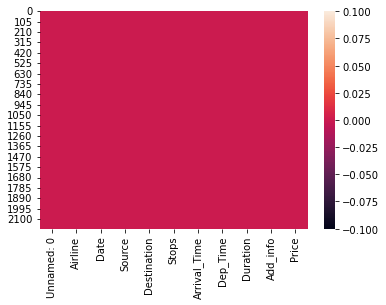

In [7]:
#below heatmap shows that there is no missing values
sns.heatmap(df.isnull())

In [8]:
#columns of data set
df.columns

Index(['Unnamed: 0', 'Airline', 'Date', 'Source', 'Destination', 'Stops',
       'Arrival_Time', 'Dep_Time', 'Duration', 'Add_info', 'Price'],
      dtype='object')

# Visulazation

IndiGo       692
Vistara      576
Air India    492
Go First     269
Air Asia      98
SpiceJet      69
StarAir        1
Name: Airline, dtype: int64


<AxesSubplot:xlabel='Airline', ylabel='count'>

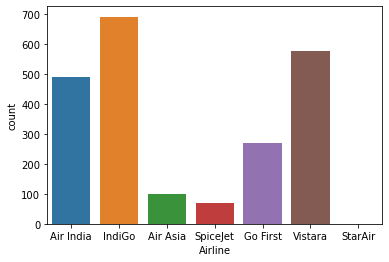

In [9]:
print(df['Airline'].value_counts())
sns.countplot(df['Airline'])

In [10]:
print(df['Source'].value_counts())

Mumbai        497
Bangalore     310
Goa           220
Chennai       203
Jaipur        162
Kolkata       131
Kochi         124
Hyderabad     108
Pune           99
Nagpur         97
Chandigarh     91
Ahmedabad      54
Dehradun       37
Lucknow        25
Surat          23
Vadodara       16
Name: Source, dtype: int64


<AxesSubplot:xlabel='Source', ylabel='count'>

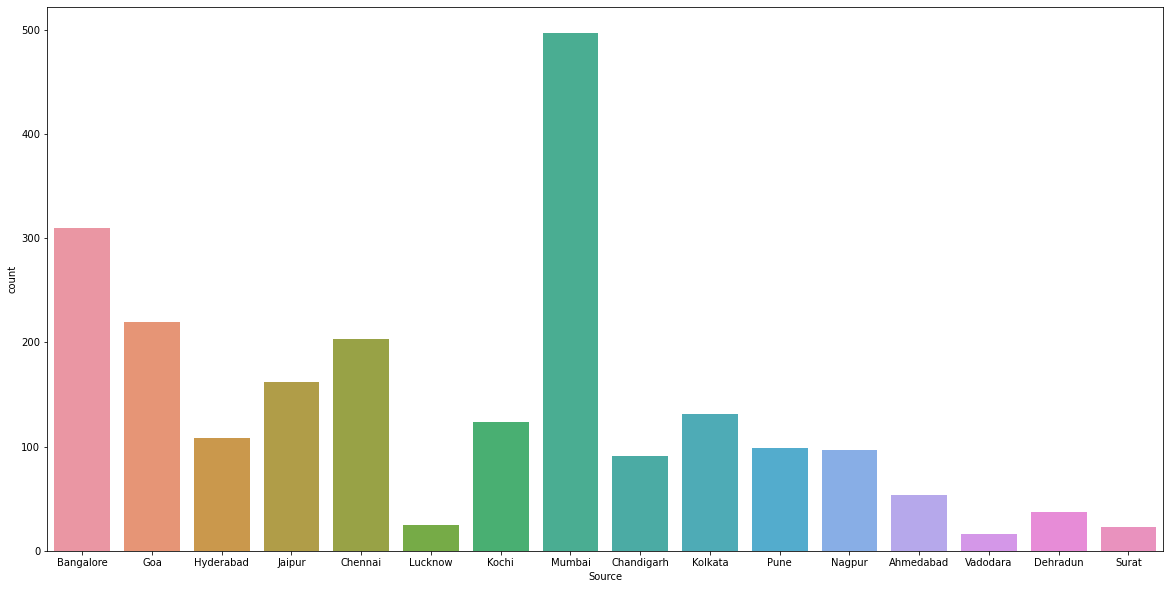

In [11]:
#below countplot shows different source values
plt.figure(figsize=(20,10))
sns.countplot(df['Source'])

Pune          446
New Delhi     391
Mumbai        347
Chennai       242
Bangalore     183
Kochi         129
Lucknow       110
Hyderabad     102
Indore         92
Chandigarh     54
Goa            51
Kolkata        50
Name: Destination, dtype: int64


<AxesSubplot:xlabel='Destination', ylabel='count'>

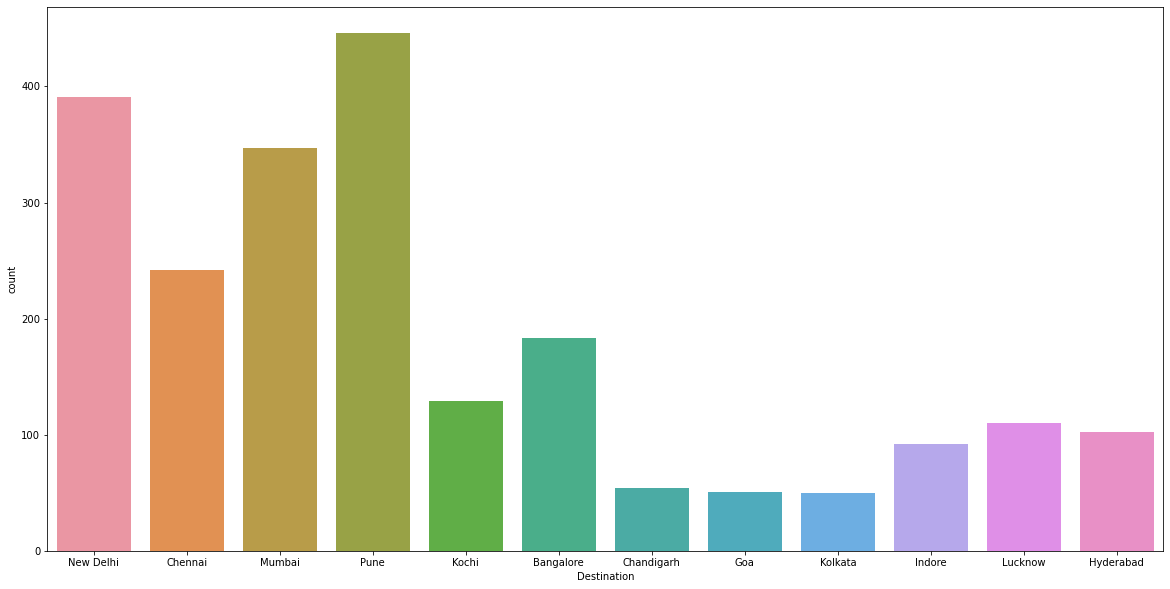

In [12]:
#below countplot of  destination column shows different values of destination.
print(df['Destination'].value_counts())
plt.figure(figsize=(20,10))
sns.countplot(df['Destination'])

1 Stop       1467
2 Stop(s)     418
Non Stop      251
3 Stop(s)      57
4 Stop(s)       4
Name: Stops, dtype: int64


<AxesSubplot:xlabel='Stops', ylabel='count'>

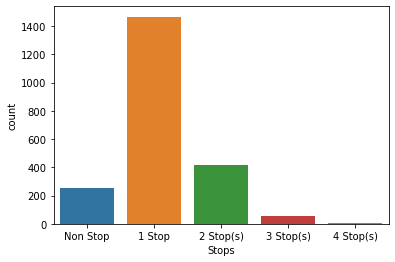

In [13]:
#below countplot shows different values for stops column
print(df['Stops'].value_counts())
sns.countplot(df['Stops'])

No Meal Fare    1630
Free Meal        358
--               209
Name: Add_info, dtype: int64


<AxesSubplot:xlabel='Add_info', ylabel='count'>

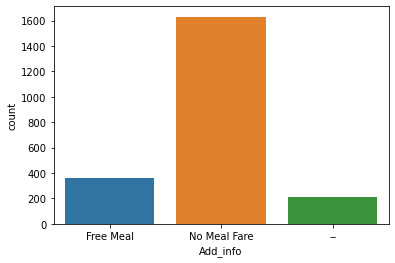

In [14]:
print(df['Add_info'].value_counts())
sns.countplot(df['Add_info'])

In [15]:
#additional info have "--" values, so these values should be replaced by no info
df['Add_info']=df['Add_info'].replace('--','No info')

No Meal Fare    1630
Free Meal        358
No info          209
Name: Add_info, dtype: int64


<AxesSubplot:xlabel='Add_info', ylabel='count'>

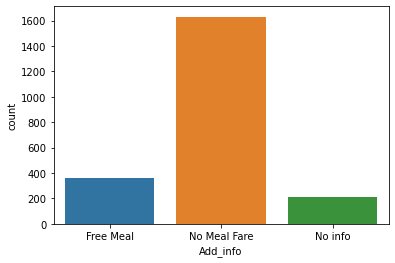

In [16]:
print(df['Add_info'].value_counts())
sns.countplot(df['Add_info'])

In [17]:
print(df['Arrival_Time'].unique())

['20:20' '08:45' '23:45' '18:10' '20:25' '00:45\n+ 1 day' '22:25' '19:55'
 '01:40\n+ 1 day' '18:30' '22:35' '07:15\n+ 1 day' '17:35' '16:10'
 '09:15\n+ 1 day' '20:10' '20:50' '00:25\n+ 1 day' '19:50'
 '13:00\n+ 1 day' '13:00' '19:25' '02:50' '08:55' '08:40' '12:15' '14:05'
 '16:45' '21:50' '03:35' '09:30' '10:30' '19:20' '23:50' '00:35\n+ 1 day'
 '01:00\n+ 1 day' '07:35' '14:50' '20:45' '22:10' '01:05\n+ 1 day' '23:10'
 '08:55\n+ 1 day' '10:15\n+ 1 day' '11:10\n+ 1 day' '19:20\n+ 1 day'
 '13:50\n+ 1 day' '18:30\n+ 1 day' '09:40' '10:40' '14:10' '12:40' '23:30'
 '00:50\n+ 1 day' '12:10' '09:00\n+ 1 day' '12:30\n+ 1 day'
 '20:00\n+ 1 day' '22:40\n+ 1 day' '18:15' '12:15\n+ 1 day'
 '21:15\n+ 1 day' '10:40\n+ 1 day' '14:30' '12:20' '16:30' '18:00' '15:40'
 '11:55' '21:30' '12:00' '20:30\n+ 1 day' '13:30' '21:35' '16:15' '21:15'
 '16:00\n+ 1 day' '23:25\n+ 1 day' '01:45\n+ 1 day' '10:55'
 '11:20\n+ 1 day' '02:10\n+ 1 day' '21:45' '15:30' '14:00' '21:00'
 '00:30\n+ 1 day' '19:00' '12:55' '22

In [18]:
print(df['Dep_Time'].unique())

['17:20' '05:45' '18:45' '13:05' '15:20' '16:20' '18:40' '11:20' '23:45'
 '09:50' '10:15' '09:20' '06:55' '21:55' '09:05' '23:00' '07:10' '13:00'
 '05:40' '11:50' '10:25' '09:45' '00:10' '06:15' '05:55' '09:30' '14:00'
 '19:05' '00:45' '06:40' '07:40' '16:30' '21:00' '21:45' '22:10' '04:40'
 '11:55' '17:50' '19:15' '20:10' '06:45' '19:10' '18:50' '17:45' '21:10'
 '07:00' '08:00' '11:30' '19:40' '19:25' '07:30' '10:05' '08:10' '06:10'
 '15:30' '15:05' '20:45' '05:25' '18:30' '16:10' '09:15' '07:05' '07:25'
 '11:45' '08:30' '17:30' '06:05' '14:25' '21:40' '18:25' '08:55' '12:20'
 '15:45' '20:15' '22:00' '10:40' '18:20' '16:15' '15:00' '19:55' '20:20'
 '08:20' '17:55' '17:35' '07:55' '09:35' '19:50' '17:05' '08:45' '18:55'
 '13:40' '07:20' '21:15' '18:05' '14:40' '12:10' '20:25' '15:40' '14:30'
 '11:35' '20:30' '11:10' '07:35' '17:25' '15:25' '12:15' '09:55' '13:20'
 '10:55' '13:10' '16:00' '22:20' '05:15' '13:55' '08:05' '06:35' '23:50'
 '05:50' '17:40' '05:30' '08:15' '12:00' '12:45' '2

In [19]:
print(df['Date'].value_counts())

Tue, 9 Nov 2021     314
Wed, 3 Nov 2021     234
Tue, 23 Nov 2021    161
Sat, 6 Nov 2021     156
Thu, 11 Nov 2021    146
Tue, 19 Oct 2021    132
Tue, 2 Nov 2021     111
Mon, 15 Nov 2021    106
Sat, 13 Nov 2021    102
Tue, 26 Oct 2021    101
Thu, 28 Oct 2021     92
Thu, 21 Oct 2021     88
Sun, 31 Oct 2021     85
Mon, 8 Nov 2021      79
Fri, 12 Nov 2021     75
Sun, 7 Nov 2021      61
Mon, 1 Nov 2021      52
Wed, 15 Dec 2021     51
Sat, 11 Dec 2021     48
Fri, 10 Dec 2021      2
Mon, 25 Oct 2021      1
Name: Date, dtype: int64


In [20]:
#convert stops values into numerical values
df['Stops']=df['Stops'].replace("Non Stop",0)
df['Stops']=df['Stops'].replace("1 Stop",1)
df['Stops']=df['Stops'].replace("2 Stop(s)",2)
df['Stops']=df['Stops'].replace("3 Stop(s)",3)
df['Stops']=df['Stops'].replace("4 Stop(s)",4)

In [21]:
df['Stops']=df['Stops'].astype(int)
df['Stops']

0       0
1       0
2       1
3       1
4       1
       ..
2192    2
2193    2
2194    2
2195    2
2196    2
Name: Stops, Length: 2197, dtype: int32

In [22]:
df['Price']

0        3,234
1        3,546
2        3,546
3        3,546
4        3,546
         ...  
2192    20,163
2193    20,163
2194    21,528
2195    22,788
2196    37,531
Name: Price, Length: 2197, dtype: object

In [23]:
#convert price values into numerical values
df['Price']=df['Price'].str.replace(",",'')
df['Price']=df['Price'].astype(int)
df['Price']

0        3234
1        3546
2        3546
3        3546
4        3546
        ...  
2192    20163
2193    20163
2194    21528
2195    22788
2196    37531
Name: Price, Length: 2197, dtype: int32

In [24]:
#convert date values into datetime values
df['Date']=df['Date'].str.split(",").str.get(1)

In [25]:
df['Date']

0        23 Nov 2021
1        23 Nov 2021
2        23 Nov 2021
3        23 Nov 2021
4        23 Nov 2021
            ...     
2192      6 Nov 2021
2193      6 Nov 2021
2194      6 Nov 2021
2195      6 Nov 2021
2196      6 Nov 2021
Name: Date, Length: 2197, dtype: object

In [26]:
df['Date']=pd.to_datetime(df['Date'])

In [27]:
df['Date']

0      2021-11-23
1      2021-11-23
2      2021-11-23
3      2021-11-23
4      2021-11-23
          ...    
2192   2021-11-06
2193   2021-11-06
2194   2021-11-06
2195   2021-11-06
2196   2021-11-06
Name: Date, Length: 2197, dtype: datetime64[ns]

In [28]:
#derive new features
df["flight_date"] = pd.to_datetime(df["Date"]).dt.day
df["flight_month"] = pd.to_datetime(df["Date"]).dt.month
df['flight_year']=pd.to_datetime(df["Date"]).dt.year

In [29]:
df.drop('Date',axis=1,inplace=True)

In [30]:
df

,Unnamed: 0,Airline,Source,Destination,Stops,Arrival_Time,Dep_Time,Duration,Add_info,Price,flight_date,flight_month,flight_year
0,0,Air India,Bangalore,New Delhi,0,20:20,17:20,3h 00m,Free Meal,3234,23,11,2021
1,1,Air India,Bangalore,New Delhi,0,08:45,05:45,3h 00m,Free Meal,3546,23,11,2021
2,2,IndiGo,Bangalore,New Delhi,1,23:45,18:45,5h 00m,No Meal Fare,3546,23,11,2021
3,3,IndiGo,Bangalore,New Delhi,1,18:10,13:05,5h 05m,No Meal Fare,3546,23,11,2021
4,4,IndiGo,Bangalore,New Delhi,1,20:25,15:20,5h 05m,No Meal Fare,3546,23,11,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,2192,Vistara,Chennai,Pune,2,18:35,07:00,11h 35m,No Meal Fare,20163,6,11,2021
2193,2193,Vistara,Chennai,Pune,2,18:35,07:00,11h 35m,No Meal Fare,20163,6,11,2021
2194,2194,Air India,Chennai,Pune,2,18:10,08:30,9h 40m,No Meal Fare,21528,6,11,2021
2195,2195,Air India,Chennai,Pune,2,18:10,06:20,11h 50m,No Meal Fare,22788,6,11,2021


In [31]:
#derive dep_hrs and dep_min from departure time
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [32]:
df['Arrival_Time']=df['Arrival_Time'].str.split("\n").str.get(0)

In [33]:
#derive arrival minute and arrival hrs from arrival time column
df["arr_hr"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["arr_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

In [34]:
df.head()

,Unnamed: 0,Airline,Source,Destination,Stops,Arrival_Time,Dep_Time,Duration,Add_info,Price,flight_date,flight_month,flight_year,Dep_hour,Dep_min,arr_hr,arr_min
0,0,Air India,Bangalore,New Delhi,0,20:20,17:20,3h 00m,Free Meal,3234,23,11,2021,17,20,20,20
1,1,Air India,Bangalore,New Delhi,0,08:45,05:45,3h 00m,Free Meal,3546,23,11,2021,5,45,8,45
2,2,IndiGo,Bangalore,New Delhi,1,23:45,18:45,5h 00m,No Meal Fare,3546,23,11,2021,18,45,23,45
3,3,IndiGo,Bangalore,New Delhi,1,18:10,13:05,5h 05m,No Meal Fare,3546,23,11,2021,13,5,18,10
4,4,IndiGo,Bangalore,New Delhi,1,20:25,15:20,5h 05m,No Meal Fare,3546,23,11,2021,15,20,20,25


In [35]:
df.drop('Dep_Time',axis=1,inplace=True)
df.drop('Arrival_Time',axis=1,inplace=True)

In [36]:
df['Dur_hrs']=df['Duration'].str.split('h').str.get(0)
df['Dur_min']=df['Duration'].str.split('h').str.get(1)

In [37]:
df['Dur_min']=df['Dur_min'].str.replace('m','')

In [38]:
df.head(10)

,Unnamed: 0,Airline,Source,Destination,Stops,Duration,Add_info,Price,flight_date,flight_month,flight_year,Dep_hour,Dep_min,arr_hr,arr_min,Dur_hrs,Dur_min
0,0,Air India,Bangalore,New Delhi,0,3h 00m,Free Meal,3234,23,11,2021,17,20,20,20,3,00
1,1,Air India,Bangalore,New Delhi,0,3h 00m,Free Meal,3546,23,11,2021,5,45,8,45,3,00
2,2,IndiGo,Bangalore,New Delhi,1,5h 00m,No Meal Fare,3546,23,11,2021,18,45,23,45,5,00
3,3,IndiGo,Bangalore,New Delhi,1,5h 05m,No Meal Fare,3546,23,11,2021,13,5,18,10,5,05
4,4,IndiGo,Bangalore,New Delhi,1,5h 05m,No Meal Fare,3546,23,11,2021,15,20,20,25,5,05
5,5,IndiGo,Bangalore,New Delhi,1,6h 00m,No Meal Fare,3546,23,11,2021,18,45,0,45,6,00
6,6,IndiGo,Bangalore,New Delhi,1,6h 05m,No Meal Fare,3546,23,11,2021,16,20,22,25,6,05
7,7,IndiGo,Bangalore,New Delhi,1,6h 50m,No Meal Fare,3546,23,11,2021,13,5,19,55,6,50
8,8,IndiGo,Bangalore,New Delhi,1,7h 00m,No Meal Fare,3546,23,11,2021,18,40,1,40,7,00
9,9,IndiGo,Bangalore,New Delhi,1,7h 10m,No Meal Fare,3546,23,11,2021,11,20,18,30,7,10


In [39]:
#derive duraton hrs and duration minutes from duration column
df['Dur_hrs']=df['Dur_hrs'].astype(int)
df['Dur_min']=df['Dur_min'].astype(int)

In [40]:
df.drop('Duration',axis=1,inplace=True)

In [41]:
df.head(10)

,Unnamed: 0,Airline,Source,Destination,Stops,Add_info,Price,flight_date,flight_month,flight_year,Dep_hour,Dep_min,arr_hr,arr_min,Dur_hrs,Dur_min
0,0,Air India,Bangalore,New Delhi,0,Free Meal,3234,23,11,2021,17,20,20,20,3,0
1,1,Air India,Bangalore,New Delhi,0,Free Meal,3546,23,11,2021,5,45,8,45,3,0
2,2,IndiGo,Bangalore,New Delhi,1,No Meal Fare,3546,23,11,2021,18,45,23,45,5,0
3,3,IndiGo,Bangalore,New Delhi,1,No Meal Fare,3546,23,11,2021,13,5,18,10,5,5
4,4,IndiGo,Bangalore,New Delhi,1,No Meal Fare,3546,23,11,2021,15,20,20,25,5,5
5,5,IndiGo,Bangalore,New Delhi,1,No Meal Fare,3546,23,11,2021,18,45,0,45,6,0
6,6,IndiGo,Bangalore,New Delhi,1,No Meal Fare,3546,23,11,2021,16,20,22,25,6,5
7,7,IndiGo,Bangalore,New Delhi,1,No Meal Fare,3546,23,11,2021,13,5,19,55,6,50
8,8,IndiGo,Bangalore,New Delhi,1,No Meal Fare,3546,23,11,2021,18,40,1,40,7,0
9,9,IndiGo,Bangalore,New Delhi,1,No Meal Fare,3546,23,11,2021,11,20,18,30,7,10


In [42]:
#encode categorical data using get_dummies method
dummies=pd.get_dummies(df[['Airline','Source','Destination']])

In [43]:
dummies

,Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_StarAir,Airline_Vistara,Source_Ahmedabad,Source_Bangalore,Source_Chandigarh,...,Destination_Chennai,Destination_Goa,Destination_Hyderabad,Destination_Indore,Destination_Kochi,Destination_Kolkata,Destination_Lucknow,Destination_Mumbai,Destination_New Delhi,Destination_Pune
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2193,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2194,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2195,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
#checking co relation
df.corr()

,Unnamed: 0,Stops,Price,flight_date,flight_month,flight_year,Dep_hour,Dep_min,arr_hr,arr_min,Dur_hrs,Dur_min
Unnamed: 0,1.000000,0.097732,0.165073,-0.548140,0.493588,NaN,-0.043974,-0.078313,-0.017742,0.051096,0.044995,0.011617
Stops,0.097732,1.000000,0.527381,-0.064107,0.023406,NaN,-0.046607,-0.026569,0.091530,-0.056115,0.654075,0.006854
Price,0.165073,0.527381,1.000000,-0.095109,-0.148830,NaN,0.006631,-0.023304,0.092502,-0.035472,0.447716,-0.011674
flight_date,-0.548140,-0.064107,-0.095109,1.000000,-0.636574,NaN,-0.029629,0.031878,0.005660,0.002562,-0.031701,-0.012350
flight_month,0.493588,0.023406,-0.148830,-0.636574,1.000000,NaN,-0.040200,-0.010177,-0.042032,0.054089,-0.021623,0.064288
flight_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_hour,-0.043974,-0.046607,0.006631,-0.029629,-0.040200,NaN,1.000000,-0.059076,-0.009503,-0.004385,0.100812,-0.050177
Dep_min,-0.078313,-0.026569,-0.023304,0.031878,-0.010177,NaN,-0.059076,1.000000,-0.053245,-0.029402,-0.007742,-0.014628
arr_hr,-0.017742,0.091530,0.092502,0.005660,-0.042032,NaN,-0.009503,-0.053245,1.000000,0.028841,0.025560,0.003775
arr_min,0.051096,-0.056115,-0.035472,0.002562,0.054089,NaN,-0.004385,-0.029402,0.028841,1.000000,-0.053325,-0.008551


<AxesSubplot:>

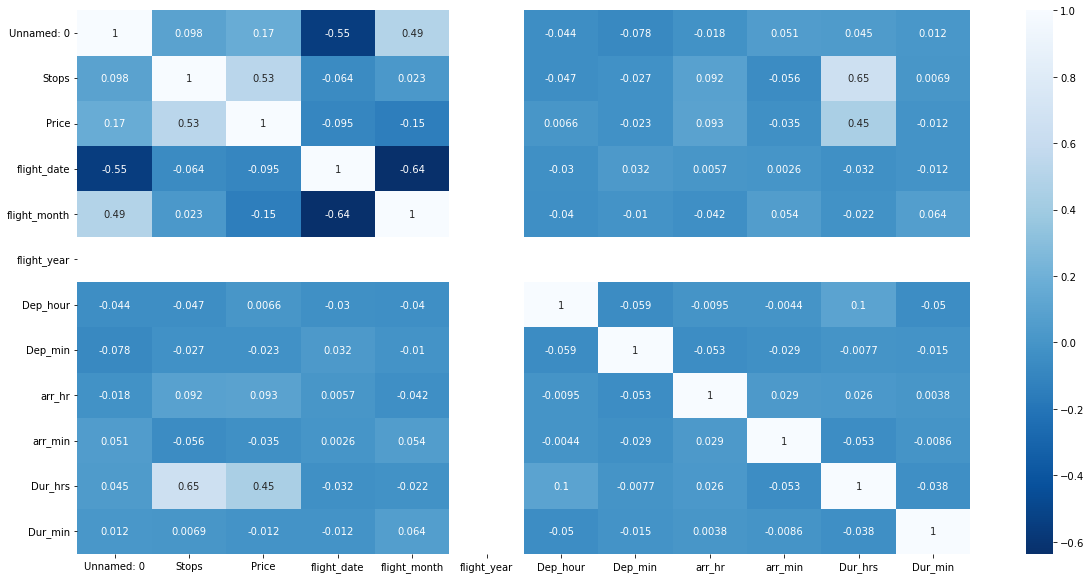

In [45]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='Blues_r',annot=True)

In [46]:
#stastical summary
df.describe()

,Unnamed: 0,Stops,Price,flight_date,flight_month,flight_year,Dep_hour,Dep_min,arr_hr,arr_min,Dur_hrs,Dur_min
count,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.0,2197.000000,2197.000000,2197.00000,2197.000000,2197.000000,2197.000000
mean,1098.000000,1.133364,10487.762403,12.950842,10.818844,2021.0,12.366864,26.324533,15.06782,27.173418,11.820665,26.520255
std,634.363592,0.638020,4873.557290,8.390153,0.490297,0.0,5.336675,17.141403,5.83372,17.257254,8.263184,16.614979
min,0.000000,0.000000,3234.000000,1.000000,10.000000,2021.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,549.000000,1.000000,6426.000000,6.000000,11.000000,2021.0,8.000000,10.000000,11.00000,10.000000,6.000000,15.000000
50%,1098.000000,1.000000,9832.000000,11.000000,11.000000,2021.0,11.000000,25.000000,16.00000,25.000000,9.000000,25.000000
75%,1647.000000,1.000000,13386.000000,19.000000,11.000000,2021.0,17.000000,40.000000,19.00000,40.000000,17.000000,40.000000
max,2196.000000,4.000000,47902.000000,31.000000,12.000000,2021.0,23.000000,55.000000,23.00000,55.000000,40.000000,55.000000


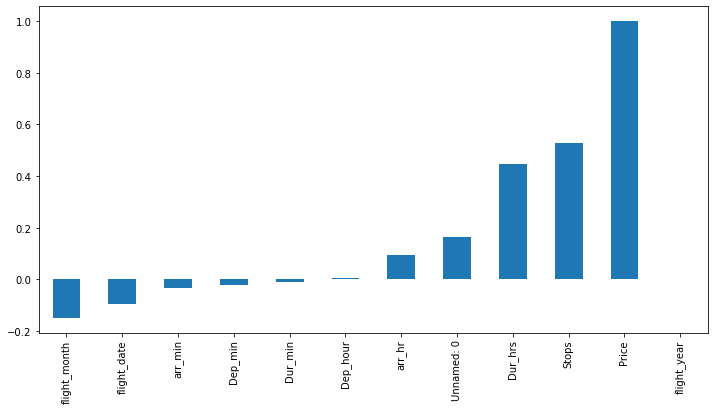

In [47]:
#checking corelation of features according to price value
plt.figure(figsize=(12,6))
df.corr()['Price'].sort_values().plot(kind='bar');

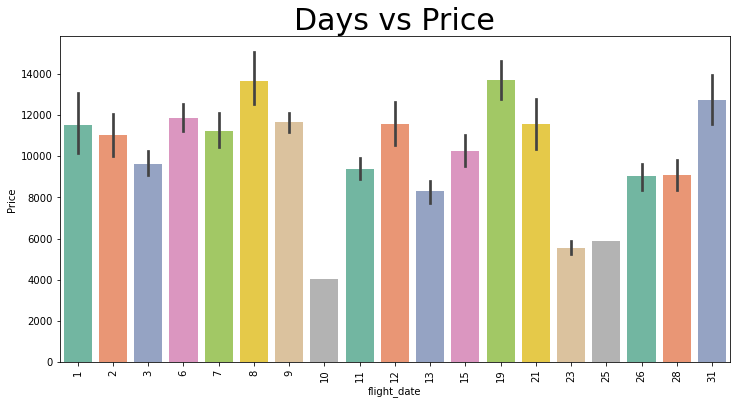

In [48]:
#checking on which day flights have high price
plt.figure(figsize=(12,6))
sns.barplot(df['flight_date'], df['Price'], palette='Set2')
plt.title('Days vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

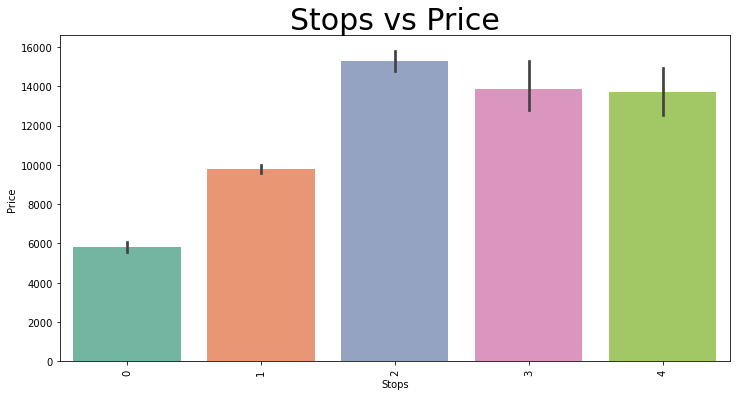

In [49]:
#checking stops vs price:as shown in following plot,flights which are having 2,3,4 stops have high values
plt.figure(figsize=(12,6))
sns.barplot(df['Stops'], df['Price'], palette='Set2')
plt.title('Stops vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

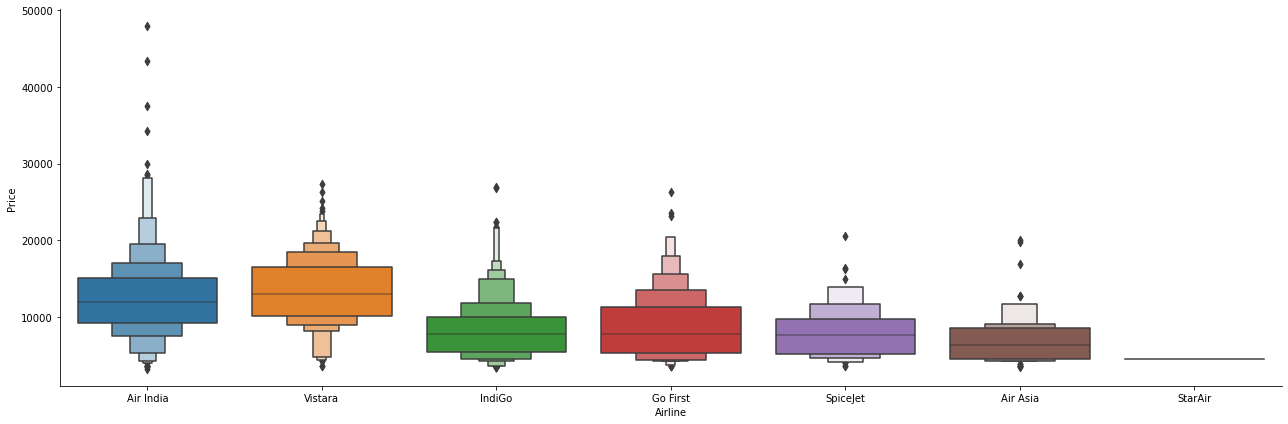

In [50]:
#following fig shows which airline have a high price, as shown in fig air india airline have high price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

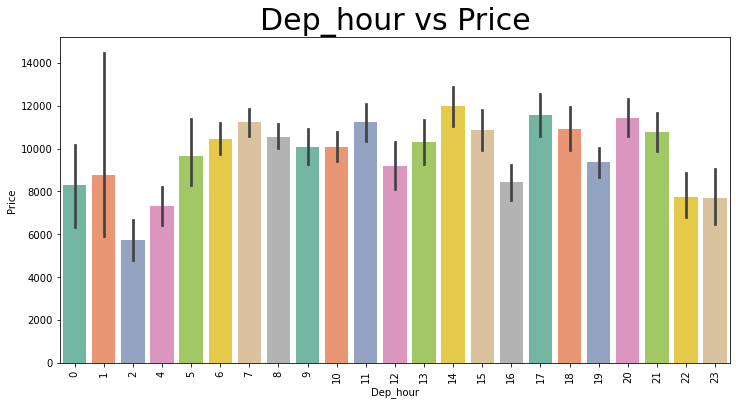

In [51]:
#as shown in following fig morning fights have high price
plt.figure(figsize=(12,6))
sns.barplot(df['Dep_hour'], df['Price'], palette='Set2')
plt.title('Dep_hour vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

In [52]:
#concat dummies and other columns of dataframe into one dataframe
df1=pd.concat([dummies, df._get_numeric_data()], axis=1)

In [53]:
#separate input features and target features
x=df1.drop(['Price','flight_year'],axis=1)
y=df1['Price']

In [54]:
df1

,Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_StarAir,Airline_Vistara,Source_Ahmedabad,Source_Bangalore,Source_Chandigarh,...,Price,flight_date,flight_month,flight_year,Dep_hour,Dep_min,arr_hr,arr_min,Dur_hrs,Dur_min
0,0,1,0,0,0,0,0,0,1,0,...,3234,23,11,2021,17,20,20,20,3,0
1,0,1,0,0,0,0,0,0,1,0,...,3546,23,11,2021,5,45,8,45,3,0
2,0,0,0,1,0,0,0,0,1,0,...,3546,23,11,2021,18,45,23,45,5,0
3,0,0,0,1,0,0,0,0,1,0,...,3546,23,11,2021,13,5,18,10,5,5
4,0,0,0,1,0,0,0,0,1,0,...,3546,23,11,2021,15,20,20,25,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,0,0,0,0,0,0,1,0,0,0,...,20163,6,11,2021,7,0,18,35,11,35
2193,0,0,0,0,0,0,1,0,0,0,...,20163,6,11,2021,7,0,18,35,11,35
2194,0,1,0,0,0,0,0,0,0,0,...,21528,6,11,2021,8,30,18,10,9,40
2195,0,1,0,0,0,0,0,0,0,0,...,22788,6,11,2021,6,20,18,10,11,50


In [55]:
#checking feature importance
from sklearn.ensemble import ExtraTreesRegressor
s1=ExtraTreesRegressor()
s1.fit(x,y)

ExtraTreesRegressor()

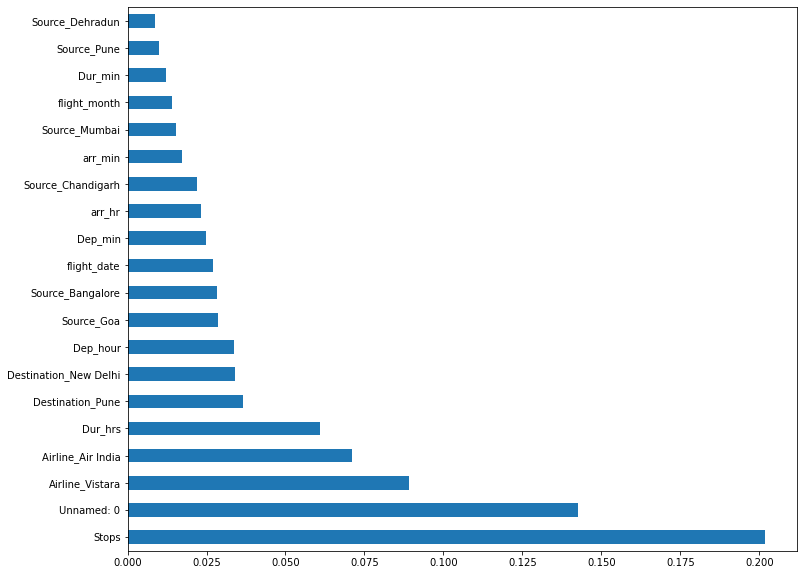

In [56]:
#as shown in below fig stops is most importat feature
plt.figure(figsize=(12,10))
fea_imp=pd.Series(s1.feature_importances_,index=x.columns)
fea_imp.nlargest(20).plot(kind='barh')
plt.show()

In [57]:
x.drop("Unnamed: 0",axis=1,inplace=True)

In [58]:
#spliting data for  training and testing 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=462)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1647, 44)
(550, 44)
(1647,)
(550,)


In [59]:
#create instace of regression algorithm
lr=LinearRegression()
dtr=DecisionTreeRegressor()

Knn=KNeighborsRegressor()
svr=SVR()
l1=Lasso(alpha=0.001)
r1=Ridge(alpha=0.001)

In [60]:
#fit data  and predict 
lst1=[lr,dtr,svr,l1,r1]
for i in lst1:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print("accuracy_scores",i)
    print("r2_score",r2_score(y_test,pred))
    print("mean_squared_error",mean_squared_error(y_test,pred))
    print("mean_absolute_error",mean_absolute_error(y_test,pred))

accuracy_scores LinearRegression()
r2_score 0.5529326617503283
mean_squared_error 10684323.607727272
mean_absolute_error 2331.8754545454544
accuracy_scores DecisionTreeRegressor()
r2_score 0.6350522232337232
mean_squared_error 8721773.686616162
mean_absolute_error 1518.3657575757577
accuracy_scores SVR()
r2_score -0.020007812321015672
mean_squared_error 24376850.234497488
mean_absolute_error 3807.7812882159615
accuracy_scores Lasso(alpha=0.001)
r2_score 0.553107068627826
mean_squared_error 10680155.51187421
mean_absolute_error 2329.0822844724867
accuracy_scores Ridge(alpha=0.001)
r2_score 0.5531066253980693
mean_squared_error 10680166.104484646
mean_absolute_error 2329.0805824489817


In [61]:
r1=RandomForestRegressor()
r1.fit(x_train,y_train)
pred1=r1.predict(x_test)

In [62]:
r1.score(x_test,y_test),r1.score(x_train,y_train),r2_score(y_test,pred1)

(0.7934169747046708, 0.9526442602870486, 0.7934169747046708)

by observing scores of different models, we can say that randomforestregressor model have high r2_score.

<AxesSubplot:xlabel='Price', ylabel='Density'>

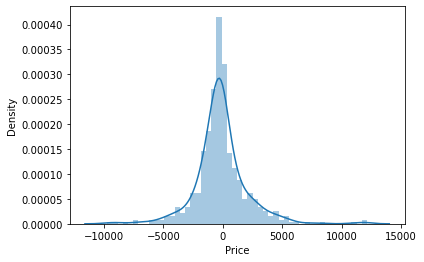

In [63]:
sns.distplot(y_test-pred1)

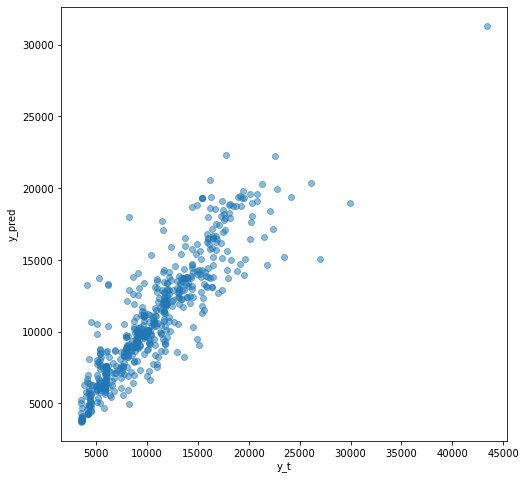

In [64]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, pred1, alpha = 0.5)
plt.xlabel("y_t")
plt.ylabel("y_pred")
plt.show()

above plots shows how close predicted values and actual values from each other

# Hyper Parameter Tunning

In [66]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
            "n_estimators"      : [10,20,30,50,60],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8,10,12],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, n_jobs=-1, cv=7)

grid.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8, 10, 12],
                         'n_estimators': [10, 20, 30, 50, 60]})

In [67]:
grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 60}

In [68]:
from sklearn.ensemble import RandomForestRegressor
rf1=RandomForestRegressor(bootstrap=False,max_features= 'sqrt',min_samples_split=2,n_estimators=50)
rf1.fit(x_train,y_train)
rpred=rf1.predict(x_test)
cv3=cross_val_score(rf1,x_train,y_train,cv=5)
print("score",cv3)

print('mean squared error',mean_squared_error(rpred,y_test))
print("r2_score",r2_score(y_test,rpred))

score [0.69354596 0.60675068 0.66118318 0.67260811 0.66718176]
mean squared error 4634796.928098869
r2_score 0.8060648102726572


select model which give high r2_score and create object file

In [70]:
import joblib

In [71]:
joblib.dump(r1,"Flight_price.obj")

['Flight_price.obj']

In [72]:
f1=joblib.load("Flight_price.obj")

In [73]:
f1.predict(x_test)

array([13134.01      ,  9205.1       ,  5205.42      , 12587.37      ,
       17891.815     , 12749.4       , 20324.96      , 19408.375     ,
       16939.432     , 12709.18      , 18061.28114286, 13383.45      ,
        9035.82      , 13726.495     , 11660.37      ,  8480.77      ,
       11506.13      , 17716.18      ,  8873.59      ,  5573.14      ,
        4007.06      ,  8337.79      , 19315.014     , 11951.66      ,
       10084.03      , 12395.41      ,  4860.1       ,  6782.49      ,
       14166.48      ,  6230.02      , 11457.32      ,  5686.77      ,
        5815.59      , 17114.31      , 12350.575     , 11166.75      ,
        8958.6       ,  6475.89      , 13845.39      , 12431.23      ,
       16113.28      , 10805.38      ,  8616.58      , 13811.34      ,
        9061.12      , 13343.51      ,  9718.22      , 11073.1       ,
        6165.08      ,  3864.        ,  5790.45      , 11464.39      ,
        9145.83      , 16560.626     ,  4894.65      ,  8648.53      ,
      